In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, pathlib

# Project-1 folder (parent of this Notebooks/ folder)
proj_dir = pathlib.Path.cwd().parent
if str(proj_dir) not in sys.path:
    sys.path.insert(0, str(proj_dir))

# Figures folder
fig_dir = proj_dir / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

from Code.data import make_data, build_features, split_and_scale

# --- Project-wide experiment config (new variables added on as they are introduced) ---

# Data settings
N_SAMPLES   = 300    # number of samples
NOISE_SD    = 0.3     # noise standard deviation
SEED_DATA   = 42      # data generation
SEED_SPLIT  = 42      # train/test split (split_and_scale uses this)
DEG_MAX     = 15      # max polynomial degree for features
P_FIXED     = 15  
TEST_SIZE   = 0.20    # train/test split size

# --- Generate data explicitly---
x, y = make_data(n=N_SAMPLES, noise_sd=NOISE_SD, seed=SEED_DATA)
X_full = build_features(x, degree=DEG_MAX, include_bias=False)


X_tr_s, X_te_s, y_tr_c, y_te, scaler, y_mean = split_and_scale(X_full, y, test_size=TEST_SIZE, random_state=SEED_SPLIT)



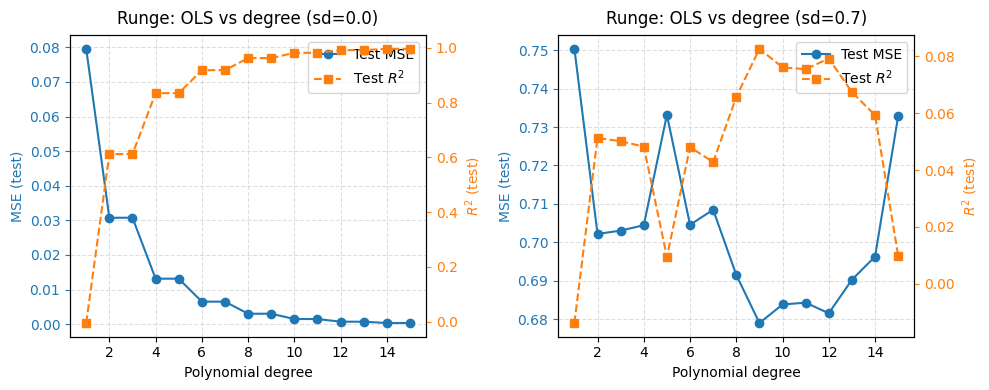

NameError: name 'norms_deg' is not defined

In [2]:

from Code.data   import make_data, build_features, split_and_scale
from Code.models import sweep_degree
from Code.plots  import plot_mse_r2_vs_degree, plot_theta_norms

noise_sds  = [0.0, 0.7]


# --- Part (a): OLS vs degree for different noise levels (using sweep_degree) ---
fig, axes = plt.subplots(1, len(noise_sds), figsize=(5*len(noise_sds), 4), sharex=True)

for ax, sd in zip(axes, noise_sds):
    # regenerate data for this noise level
    x, y    = make_data(n=N_SAMPLES, noise_sd=sd, seed=SEED_DATA)
    X_full  = build_features(x, degree=DEG_MAX, include_bias=False)

    # sweep degrees
    degrees, mse_deg, r2_deg, _ = sweep_degree(
        X_full, y, split_func=split_and_scale, deg_max=DEG_MAX
    )

    
    plot_mse_r2_vs_degree(
        degrees, mse_deg, r2_deg,
        title=f"Runge: OLS vs degree (sd={sd})",
        ax=ax, show=False, savepath=proj_dir / "Figures" / "runge_ols_mse_r2_vs_degree.png"
    )

fig.tight_layout()
# fig.savefig(proj_dir / "Figures" / "runge_ols_mse_r2_subplots.png", dpi=300, bbox_inches="tight")
plt.show()

plot_theta_norms(
    degrees, norms_deg,
    xlabel="Polynomial degree",
    title=r"OLS coefficient size vs degree ($\|\theta\|_2$)",
    savepath=fig_dir / "ols_theta_norms_vs_degree_single.png"
)

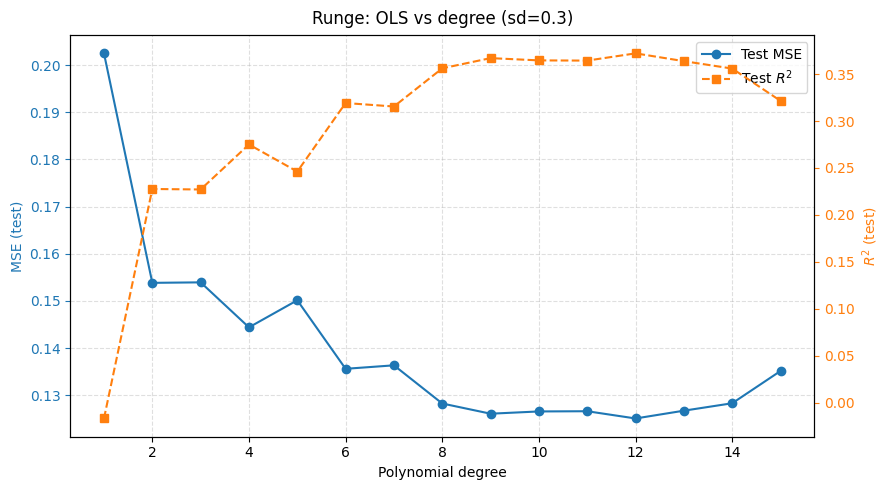

In [3]:
# our sd
sd = 0.3
x, y = make_data(n=N_SAMPLES, noise_sd=sd, seed=SEED_DATA)
X_full = build_features(x, degree=DEG_MAX, include_bias=False)
degrees, mse_deg, r2_deg, _ = sweep_degree(X_full, y, split_func=split_and_scale, deg_max=DEG_MAX)

plot_mse_r2_vs_degree(
    degrees, mse_deg, r2_deg,
    title=f"Runge: OLS vs degree (sd={sd})",
    ax=None, show=True,
    savepath=fig_dir / f"runge_ols_mse_r2_vs_degree_sd{sd:.1f}.png"
)